In [57]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df=yf.download("AAPL",start="2018-01-01",end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [60]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880947,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070831,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538445,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200


In [61]:
df=df["Close"].to_frame()
df.head()


,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [62]:
df["Close in 10 changes"]=df["Close"].shift(-10)

In [63]:
df.head(20)


,Close,Close in 10 changes
Date,,
2018-01-02,43.064999,44.775002
2018-01-03,43.057499,44.814999
2018-01-04,43.257500,44.615002
2018-01-05,43.750000,44.250000
2018-01-08,43.587502,44.259998
2018-01-09,43.582500,43.555000
2018-01-10,43.572498,42.777500
2018-01-11,43.820000,42.877499
2018-01-12,44.272499,41.990002


In [64]:
dfc=df.iloc[:-10,:]


In [65]:
df.reset_index(inplace=True)

In [66]:
df.head()

,Date,Close,Close in 10 changes
0,2018-01-02,43.064999,44.775002
1,2018-01-03,43.057499,44.814999
2,2018-01-04,43.257500,44.615002
3,2018-01-05,43.750000,44.250000
4,2018-01-08,43.587502,44.259998


In [67]:
x=dfc.iloc[:,0].values.reshape(dfc.shape[0],1)
y=dfc.iloc[:,1].values

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=
0)

In [69]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))


7.7368228416737415

In [70]:
y_act_10=dfc.iloc[-10:,:]["Close in 10 changes"].values
y_act_10


array([134.50999451, 132.36999512, 132.30000305, 135.44999695,
       132.22999573, 131.86000061, 130.02999878, 126.04000092,
       129.61000061, 129.92999268])

In [71]:
y_pred_10=rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

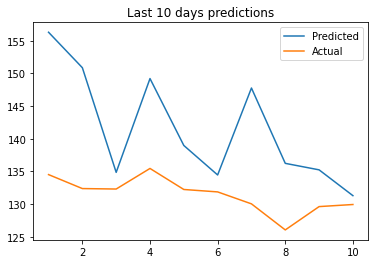

In [72]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.legend(["Predicted","Actual"])
plt.title("Last 10 days predictions")
plt.show()